### Importing  Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("darkgrid")

### Loading the dataset and basic analysis

In [4]:
df = pd.read_csv("D:\\PGD DS IIITB\\Python - Upgrad Oct 2020\\SGC\\titanic_train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age column

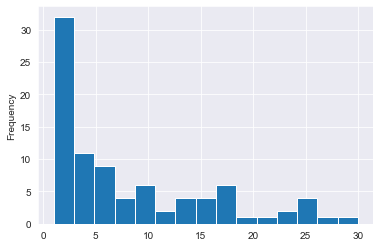

In [10]:
df["Age"].value_counts().plot.hist(bins = 15)
plt.show()

In [11]:
df["Age"].mode()

0    24.0
dtype: float64

**Inference : We cannot replace missing values by mode = 24. So we leave them as it is**

#### Embarked column

In [12]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
embarked_mode = df["Embarked"].mode()[0]

In [15]:
df["Embarked"].replace(np.nan, embarked_mode, inplace = True)

In [16]:
df["Embarked"].isnull().sum()

0

**Inference : replaced 2 null values in Embarked column with mode value 'S'**

#### Cabin column

In [17]:
df["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
F38            1
D11            1
B19            1
C85            1
C99            1
Name: Cabin, Length: 147, dtype: int64

In [18]:
df["Cabin"].isnull().sum()

687

In [19]:
df.drop(df.columns[[10]], inplace = True, axis = 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**Inference : Cabin column has large % of null values so we drop the column**

### Outliers

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Fare column

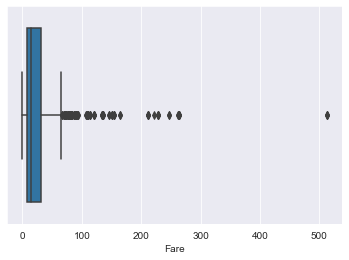

In [22]:
sns.boxplot(df["Fare"])
plt.show()

In [23]:
df[df["Fare"] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


**Inference : 3 persons with fare more than 500. Can be genuine case. So we keep the records.**

#### SibSp column

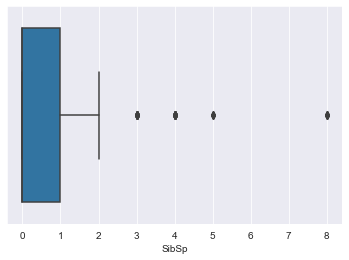

In [24]:
sns.boxplot(df["SibSp"])
plt.show()

**Inference : We keep the records**

### Univariate Analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Survived column

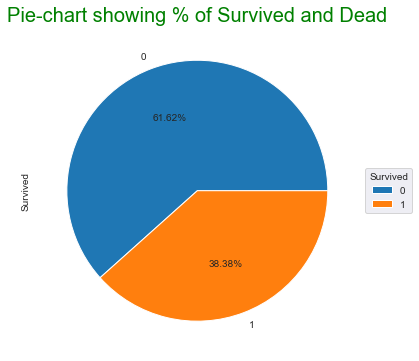

In [26]:
plt.figure(figsize= (10,6))
fig = df["Survived"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.title("Pie-chart showing % of Survived and Dead", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
fig.legend(title="Survived",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**Inference : 61.62% people died while only 38.38% survived**

#### Pclass column

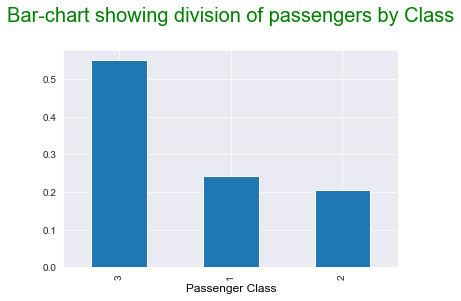

In [27]:
df["Pclass"].value_counts(normalize=True).plot.bar()
plt.title("Bar-chart showing division of passengers by Class\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Passenger Class", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Maximum passengers belonged to class 3**

#### Sex column

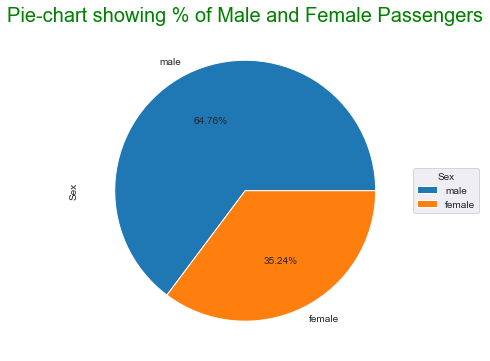

In [28]:
plt.figure(figsize= (10,6))
fig = df["Sex"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.title("Pie-chart showing % of Male and Female Passengers", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
fig.legend(title="Sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**Inference : 64.76% were male passengers while only 35.24% were female passengers**

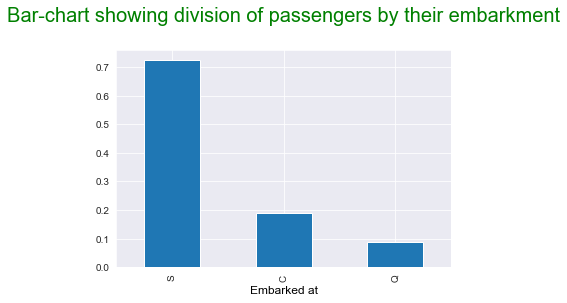

In [29]:
df["Embarked"].value_counts(normalize=True).plot.bar()
plt.title("Bar-chart showing division of passengers by their embarkment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Embarked at", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Maximum passengers embarked at S = Southampton. (C = Cherbourg; Q = Queenstown; S = Southampton)**

### Segmented Univariate Analysis

#### We divide the dataset into 2 parts based upon Survived or Not

In [30]:
sur_df = df[df["Survived"] == 1]
de_df = df[df["Survived"] == 0]

#### Pclass

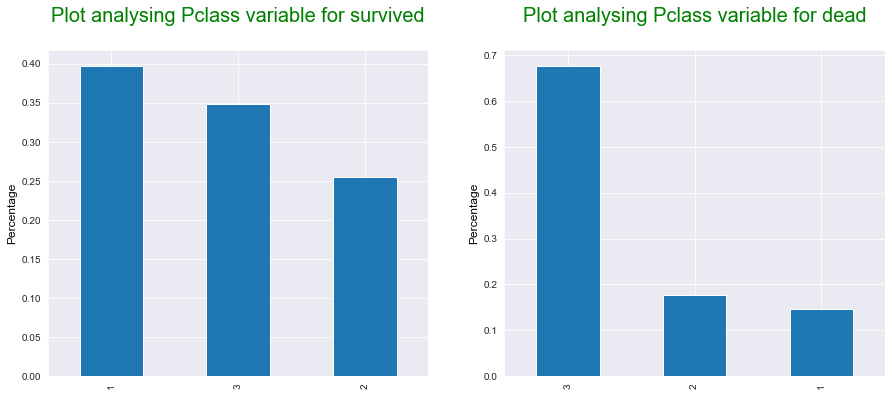

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sur_df["Pclass"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Pclass variable for survived\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
de_df["Pclass"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Pclass variable for dead\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Maximum people who survived were from 1st class whereas maximum people who could not survive were from 3rd class**

#### Sex

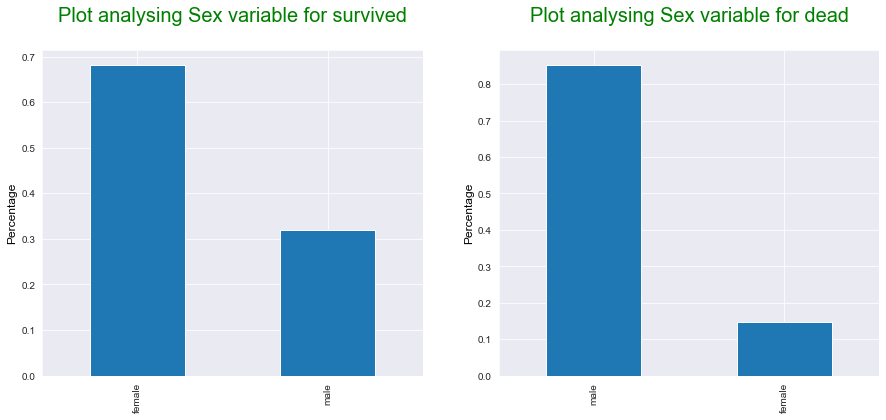

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sur_df["Sex"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Sex variable for survived\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
de_df["Sex"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Sex variable for dead\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : % of females survived is greater than males.**

#### Embarked

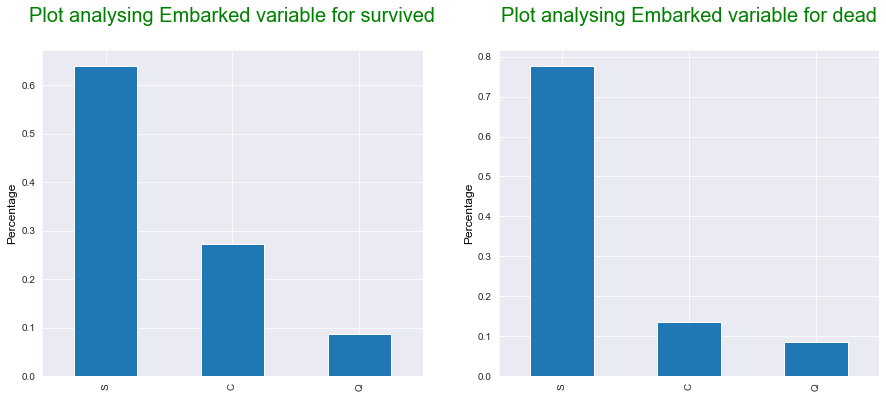

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sur_df["Embarked"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Embarked variable for survived\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
de_df["Embarked"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Embarked variable for dead\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Amongst those who survived, more than 60% of passengers had embarked at Southhampton. Amongst those who could not survive, more than 75% of passengers had embarked at Southhampton.**

### Bivariate Analysis

#### SibSp and Parch

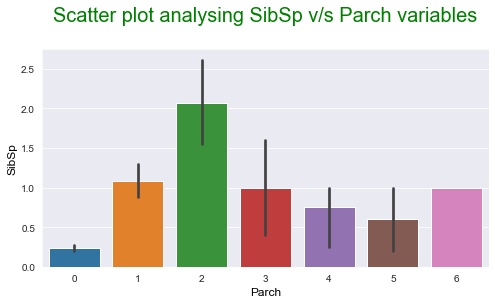

In [34]:
plt.figure(figsize= [8,4])
sns.barplot(df["Parch"], df["SibSp"])
plt.title("Scatter plot analysing SibSp v/s Parch variables\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("SibSp", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Parch", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

#### SibSp and Survived

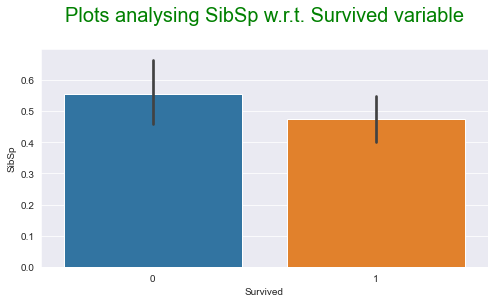

In [35]:
plt.figure(figsize= (8,4))
sns.barplot(df["Survived"], df["SibSp"])
plt.title("Plots analysing SibSp w.r.t. Survived variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()


#### Parch and Survived

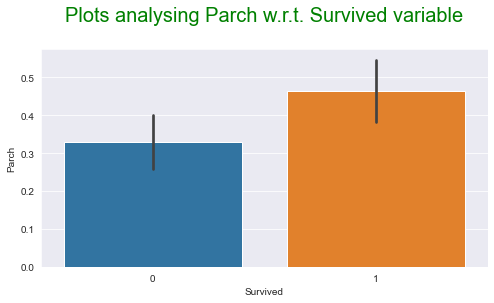

In [36]:
plt.figure(figsize= (8,4))
sns.barplot(df["Survived"], df["Parch"])
plt.title("Plots analysing Parch w.r.t. Survived variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

#### SibSp and Pclass

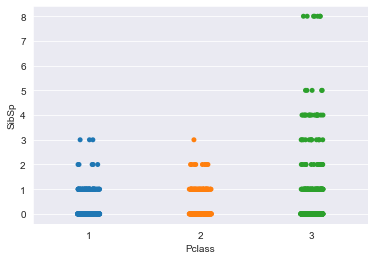

In [37]:
sns.stripplot(y = df['SibSp'], x = df['Pclass']);

#### We have already performed segmented univariate analysis. Let us see what trends we observe amongst passengers who survived

#### Pclass and Survived

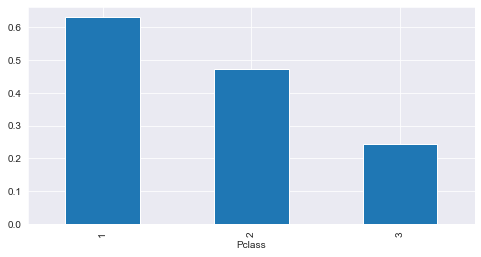

In [38]:
plt.figure(figsize= (8,4))
df.groupby("Pclass")["Survived"].mean().plot.bar()
plt.show()

**Inference : More 1st class people survived**

#### Sex and Survived

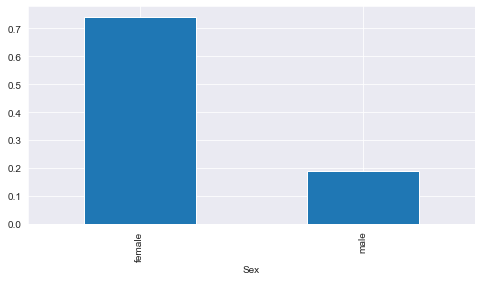

In [39]:
plt.figure(figsize= (8,4))
df.groupby("Sex")["Survived"].mean().plot.bar()
plt.show()

**Inference : More females survived**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Age - Creating buckets out of Age variable

In [41]:
df["Age_group"] = pd.cut(df["Age"], bins=[0,30,40,50,60,9999], labels = ["<30","30-40","40-50","50-60","60+"])

In [42]:
df["Age_group"].value_counts(normalize=True)

<30      0.572829
30-40    0.217087
40-50    0.120448
50-60    0.058824
60+      0.030812
Name: Age_group, dtype: float64

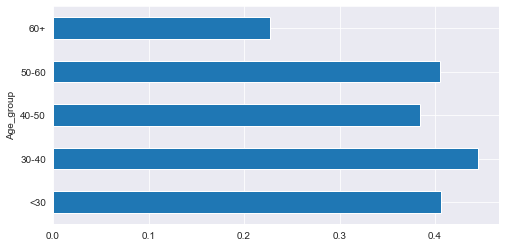

In [43]:
plt.figure(figsize= (8,4))
df.groupby("Age_group")["Survived"].mean().plot.barh()
plt.show()

**Inference : More passengers from age group 30-40 years survived**

#### Embarked

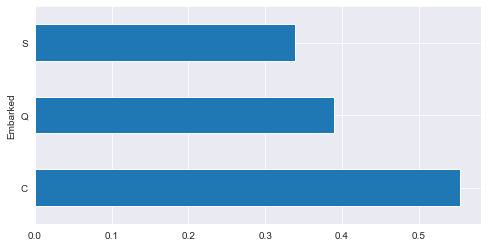

In [44]:
plt.figure(figsize= (8,4))
df.groupby("Embarked")["Survived"].mean().plot.barh()
plt.show()

**Inference : Even if maximum passengers embarked at Southampton(S), the percentage of people surviving is more for passengers who embarked at Cherbourg(C)**

#### Categorical- categorical variable analysis

#### Pclass and Embarked

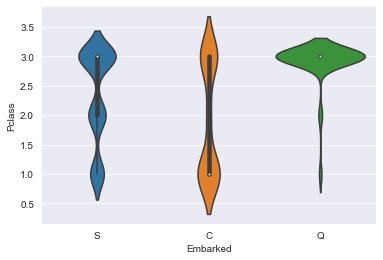

In [45]:
sns.violinplot(y = df['Pclass'], x = df['Embarked']);

**Inference : Most 3rd class people embarked at Queenstown**

#### Age Pclass

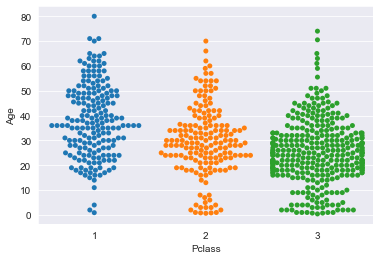

In [46]:
sns.swarmplot(y = df['Age'], x = df['Pclass']);

### Multivariate Analysis

#### Age, SibSp, Parch

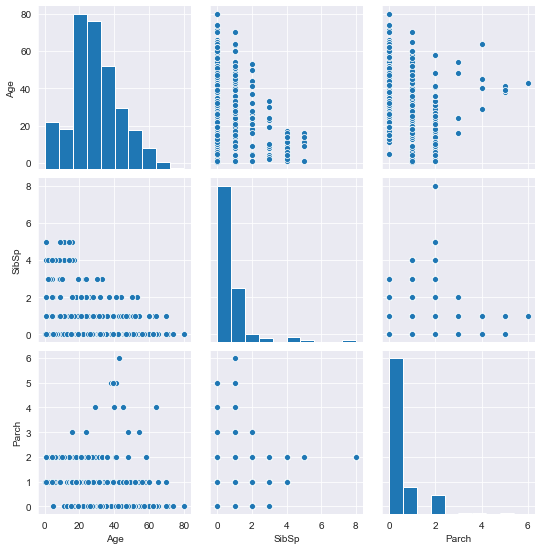

In [47]:
sns.pairplot(data = df, vars = ["Age","SibSp","Parch"])
plt.show()

#### Pclass, Sex, Survived

In [48]:
cl_sex = pd.pivot_table(data = df, index = "Sex", columns = "Pclass", values = "Survived")
cl_sex

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


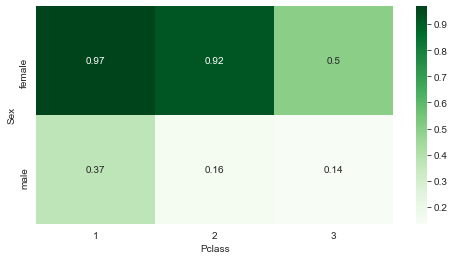

In [49]:
plt.figure(figsize= (8,4))
sns.heatmap(cl_sex, cmap = "Greens", annot = True)
plt.show()

**Inference : Maximum passengers who survived are 1st Class females while the least are 3rd class males**

#### Sex, Age_group, Survived

In [50]:
age_sex = pd.pivot_table(data = df, index = "Age_group", columns = "Sex", values = "Survived")
age_sex

Sex,female,male
Age_group,,
<30,0.721519,0.207171
30-40,0.836364,0.230000
40-50,0.677419,0.218182
50-60,0.928571,0.142857
60+,1.000000,0.105263


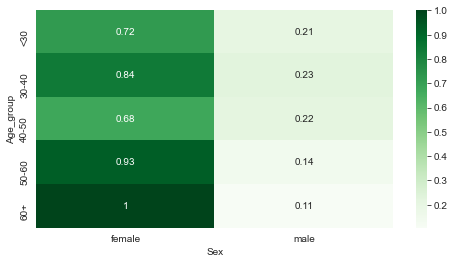

In [51]:
plt.figure(figsize= (8,4))
sns.heatmap(age_sex, cmap = "Greens", annot = True)
plt.show()

**Inference : Only one 60+ female passenger present, survived. Maximum female passengers between 50-60 years survived.**

In [52]:
age_class = pd.pivot_table(data = df, index = "Pclass", columns = "Age_group", values = "Survived")
age_class

Age_group,<30,30-40,40-50,50-60,60+
Pclass,,,,,
1,0.754098,0.755102,0.567568,0.600000,0.214286
2,0.531250,0.441860,0.526316,0.166667,0.333333
3,0.273810,0.206349,0.066667,0.000000,0.200000


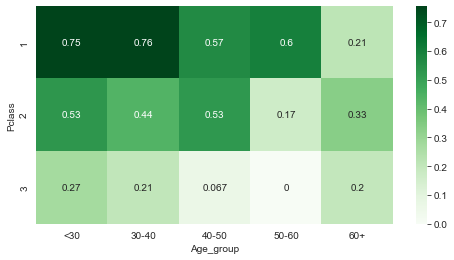

In [53]:
plt.figure(figsize= (8,4))
sns.heatmap(age_class, cmap = "Greens", annot = True)
plt.show()

**Inference : Most of 1st class passengers less than 30 years and between 30-40 years survived**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Age_group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.8+ KB


#### Sex, Embarked, Survived

In [55]:
sex_em = pd.pivot_table(data = df, index = "Embarked", columns = "Sex", values = "Survived")
sex_em

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.692683,0.174603


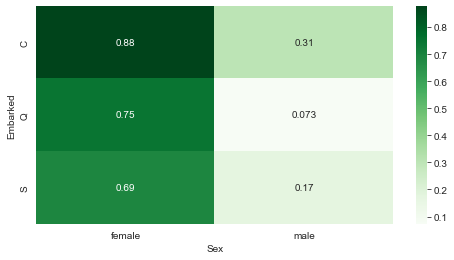

In [56]:
plt.figure(figsize= (8,4))
sns.heatmap(sex_em, cmap = "Greens", annot = True)
plt.show()

**Inference : Mximum female passengers embarked at Cherbourg survived**

In [57]:
age_em = pd.pivot_table(data = df, index = "Age_group", columns = "Embarked", values = "Survived")
age_em

Embarked,C,Q,S
Age_group,,,
<30,0.635135,0.437500,0.351097
30-40,0.560000,0.142857,0.439024
40-50,0.625000,0.000000,0.338235
50-60,0.666667,0.000000,0.310345
60+,0.000000,0.000000,0.294118


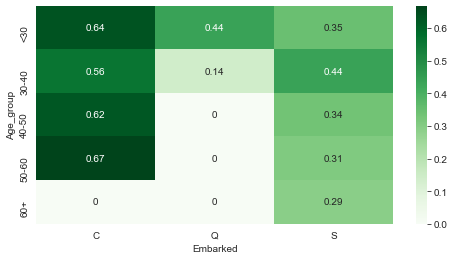

In [58]:
plt.figure(figsize= (8,4))
sns.heatmap(age_em, cmap = "Greens", annot = True)
plt.show()

**Inference: Maximum passengers below 30 years and between 50-60 years who embarked at Cherbourg, survived.**

In [59]:
class_em = pd.pivot_table(data = df, index = "Pclass", columns = "Embarked", values = "Survived")
class_em

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.589147
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


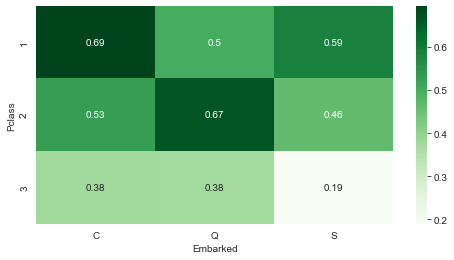

In [60]:
plt.figure(figsize= (8,4))
sns.heatmap(class_em, cmap = "Greens", annot = True)
plt.show()

**Inference: Maximum 1st class passengers embarked at Cherbourg and 2nd class passengers embarked at Queenstown, survived**

#### Pclass, Sex and Age

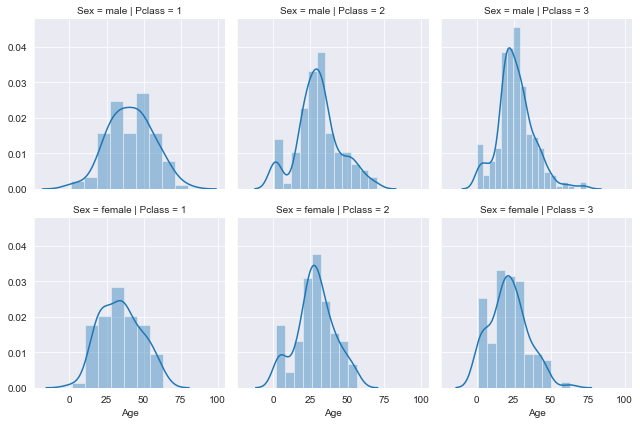

In [61]:
sns.FacetGrid(df, col = 'Pclass', row = 'Sex').map(sns.distplot, 'Age');

#### Sex, Age, Survived

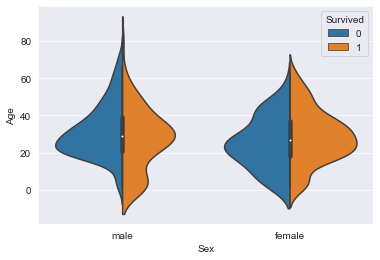

In [62]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = df, split = True);

#### Analysis with factor plot

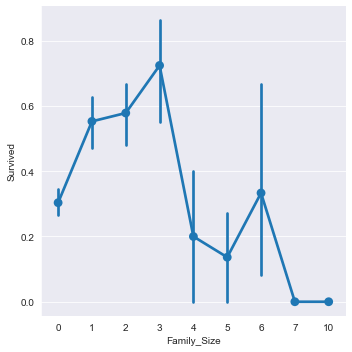

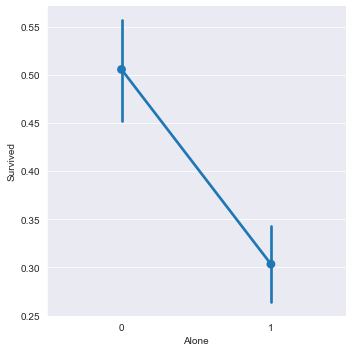

In [63]:
# Adding a column Family_Size 
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp'] 
  
# Adding a column Alone 
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data = df) 
  
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = df)

### Important Inferences :

**1. 61.62% people could not survive the Titanic journey. Only 38.38% people survived.**<br>
**2. More % of female passengers survived as compared to males.**<br>
**3. More % 1st class passengers survived.**<br>
**4. more % of 1st class passengers <30 years and between 30-40 years survived.**<br>
**5. Only 1 female passenger present >60 years of age, survived.**<br>
**6. Interestingly, even if maximum passengers embarked at Southampton(S), the percentage of people surviving is more for passengers embarking at Cherbourg(C)**<br>
**7. Many 2nd class people embarking at Queenstown, survived.**

## The analysis is complete. Thank you.